In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

### Description of the code
This code to vizualize the leapfrogging behavior of the interaction of 2 vortex rings by following the evolution of their cross-sections (4 total -- 2 for each ring) through time.
It is in 2 sections (that I had to put in the same cell for animation purposes):
1) Set-up a grid & initial parameters (including initial velocity field)\
2) Compute the change in the velocity field through time, as well as the evolution of the cross-sections

This is based on the example code provided by Prof. Lee.

#### Name: Maude Larivière (260925122)
Collab: Ana Hoban, Jasmine Parsons 

Date: Feb. 8th 2022

<IPython.core.display.Javascript object>


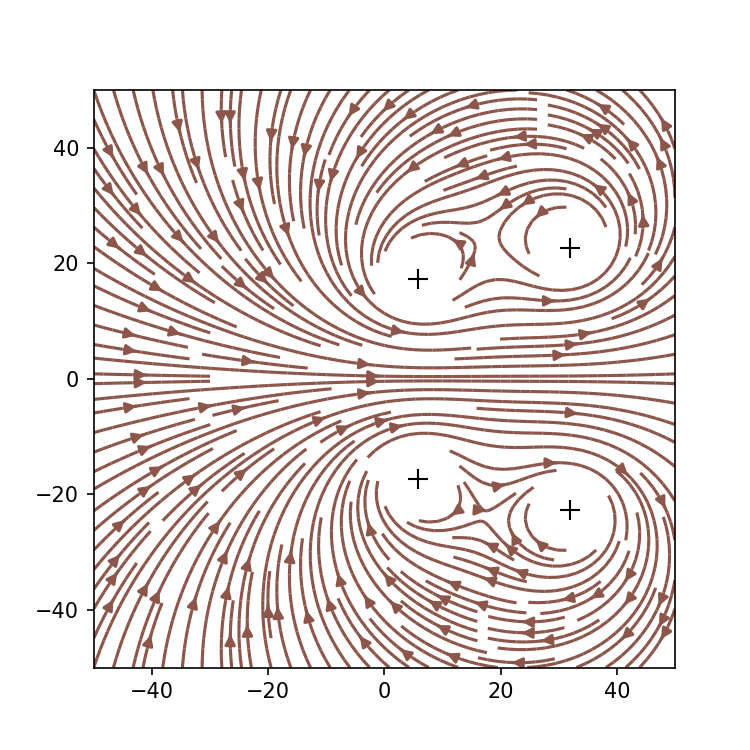

In [2]:
dt = 200 # This seems big, but because we have small circulation, we need a bigger time step to have the simulation run
         # fast enough, and to see something, otherwise, it would take so many steps that it would be too long. 
Nsteps = 35 # This is just enough to get the vortices across the box

# Setting up the initial conditions (vortex centres and circulation)

# Vortex rings
# For initial set-up [bottom left, upper left, upper right, bottom right]
x_v = np.array([-40, -40, -30, -30]) # y position of the 4 vortices
y_v = np.array([-20, 20, 20, -20]) # x position of the 4 vortices
k_v = np.array([-1,1,1,-1]) # line vortex cte k of the vortices
# Circulation is 2 * pi * k_v

# Setting up the plot
plt.ion()
fig, ax = plt.subplots(1,1,figsize=(5,5))

# Mark initial positions of vortices
p, = ax.plot(x_v, y_v, 'k+', markersize=10)

# Draw the initial velocity streamline
ngrid = 50
Y, X = np.mgrid[-ngrid:ngrid:1000j, -ngrid:ngrid:1000j]

# Initialize the velocity field arrays
vel_x = np.zeros(np.shape(X))
vel_y = np.zeros(np.shape(Y))

# Masking radius for better visualization
r_mask = 7

# Loop (1) - will be repeated so we give it a name
for i in range(len(x_v)):
    # Compute the total velocity field
    # Using cartesian coordinates
    #######
    # r = sqrt(x^2 + y^2)
    # phi = arctan(y/x)
    # phi^ = -sin(phi)x^ + cos(phi)y^
    #######
    r = np.sqrt((X-x_v[i])**2+(Y-y_v[i])**2) # We recenter our system around the vortex
    phi = np.arctan2((Y-y_v[i]),(X-x_v[i])) # Rad
    vel_x += -k_v[i]/r * np.sin(phi)
    vel_y += k_v[i]/r * np.cos(phi)
    
    # Masking streamlines inside r_mask 
    vel_x[r<r_mask] = np.nan
    vel_y[r<r_mask] = np.nan


# Set up the boundaries of the simulation box
ax.set_xlim([-ngrid,ngrid])
ax.set_ylim([-ngrid,ngrid])

# Initial plot of the streamlines
ax.streamplot(X,Y,vel_x,vel_y, density=[2,2])
fig.canvas.draw()

########### Evolution of the streamlines
count = 0

while count < Nsteps:
    
    # Re-initialize velocity fields and change vectors
    vel_x = np.zeros(np.shape(X))
    vel_y = np.zeros(np.shape(Y))
    u_x = np.zeros(np.shape(x_v)) # Change vector, advection velocity 
    u_y = np.zeros(np.shape(y_v)) # Change vector, advection velocity
    
    # Compute the advection velocity for each vortex
    for i in range(len(x_v)): # Select a vortex
        # Because each vortex is affected by 3 others, we need to go through each of the others and compute
        # its effect on our i-th vortex
        for j in range(len(x_v)): 
            if j != i: # Skipping the i-th vector
                # Compute the distance vector of the 2 vortices using cartesian/polar transformation
                distance_x = x_v[i] - x_v[j] 
                distance_y = y_v[i] - y_v[j]
                h = np.sqrt(distance_x**2+distance_y**2)
                
                # Compute the advection velocity vector for the center of our i-th vortex
                # NOTE: we are using the circulation of the j-th vortex, because it is that circulation that
                # gives the "swing" to the i-th vortex. i-th is not affected by its own circulation (at the center).
                du = k_v[j]/(2*np.pi*h)
                
                # Break that vector into x,y-component to find x,y change to the velocity
                u_x[i] += -du*np.sin(np.arctan2(distance_y,distance_x))
                u_y[i] += du*np.cos(np.arctan2(distance_y,distance_x))
              
    # Update position of the vortices
    x_v = x_v + u_x*dt
    y_v = y_v + u_y*dt
    
    # Re-init the total velocity field
    # Loop (1) again - I won't leave comments, because they can be found above.
    for i in range(len(x_v)):
        r = np.sqrt((X-x_v[i])**2+(Y-y_v[i])**2)
        phi = np.arctan2((Y-y_v[i]),(X-x_v[i])) # Rad
        vel_x += -k_v[i]/r * np.sin(phi)
        vel_y += k_v[i]/r * np.cos(phi)
        vel_x[r<r_mask] = np.nan
        vel_y[r<r_mask] = np.nan
        
    ### Update plot
    # Clear the previous steamlines
    ax.collections = []
    ax.patches = []
    
    p.set_xdata(x_v)
    p.set_ydata(y_v)
    
    ax.streamplot(X, Y, vel_x, vel_y, density = [2,2])
    
    fig.canvas.draw()
    plt.pause(0.000000000000001)
    
    # Increase count
    count += 1